# Assignment 4
Letter Recognition - http://archive.ics.uci.edu/ml/machine-learning-databases/letter-recognition/

German Data - https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data

Wine Quality - https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/

Student - https://archive.ics.uci.edu/ml/machine-learning-databases/00320/

### Importing libs

In [194]:
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_confusion_matrix
from sklearn import tree
import graphviz 
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OrdinalEncoder

In [28]:
def Statistics(name,dataSet) :
    print('\033[1m' + '\n\nStatistics for'  + name + '\033[0m')
    print(dataSet.describe(include='all'))
    print('\033[1m' + "Median" + '\033[0m' ,dataSet.median(),sep="\n")
    print('\033[1m' + "Mode" + '\033[0m' ,dataSet.mode(),sep="\n")
    print('\033[1m' + "Variance" + '\033[0m' ,dataSet.var(),sep="\n")
    print('\033[1m' + "Skewness" + '\033[0m' ,dataSet.skew(),sep="\n")
    print('\033[1m' + "Kurtosis" + '\033[0m' ,dataSet.kurtosis(),sep="\n")

In [69]:
def confusionMatrix(y_test,y_predict) :
    conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_predict)
    
    fig, ax = plot_confusion_matrix(conf_mat=conf_matrix, figsize=(26, 26), cmap=plt.cm.Greens)
    plt.xlabel('Predictions', fontsize=18)
    plt.ylabel('Actuals', fontsize=18)
    plt.title('Confusion Matrix', fontsize=18)
    plt.show()
def error() :
    pass

In [76]:
def SVM(X_train,X_test,y_train,y_test) :
    #SVM Training
    classifier = svm.SVC(kernel='linear')
    classifier.fit(X_train,y_train)
    #Prediction
    y_predict = classifier.predict(X_test)
    #Accuracy and report
    print(classification_report(y_test,y_predict))
    #Confusion Matrix
    confusionMatrix(y_test,y_predict)
    #Ploting

In [102]:
def DecisionTree(X_train,X_test,y_train,y_test) :
    #Training
    clf = tree.DecisionTreeClassifier()
    clf.fit(X_train,y_train)
    #Prediction
    y_predict = clf.predict(X_test)
    #Accuracy and Report
    print(classification_report(y_test,y_predict))
    #ConfusionMatrix
    confusionMatrix(y_test,y_predict)
    #Decision Tree
    #tree.plot_tree(clf)
    #dot_data = tree.export_graphviz(clf, out_file=None) 
    #graph = graphviz.Source(dot_data) 
    #graph.render("Tree")#Export tree as fileName.pdf 

In [103]:
def NN() :
    pass

In [207]:
def RandomForest(X_train,X_test,y_train,y_test) :
    #Training
    clf = RandomForestClassifier(max_depth=64,random_state=0)
    clf.fit(X_train,y_train)
    #Prediction
    y_predict = clf.predict(X_test)
    #Accuracy and Report
    print(classification_report(y_test,y_predict))
    #Confusion Matrix
    confusionMatrix(y_test,y_predict)

In [205]:
def doIt(X,Y) :
#     colX = [i for i in X.columns]
#     print(colX)
    encoder = OrdinalEncoder()
    X = encoder.fit_transform(X)
    Y = encoder.fit_transform(Y)
    # Statistics("letter_recognition_dataSet",X)
    X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=4)
#     SVM(X_train,X_test,y_train,y_test)
#     DecisionTree(X_train,X_test,y_train,y_test)
    #NN
    RandomForest(X_train,X_test,y_train,y_test)

## Letter Recognitition

In [150]:
letter_recognition_dataSet = pd.read_csv('letter-recognition/letter-recognition.data')
letter_recognition_dataSet.head()
X = letter_recognition_dataSet.iloc[:,1:]
Y = letter_recognition_dataSet.iloc[:,0:1]
# doIt(X,Y)

## German 

In [146]:
german_dataSet = pd.read_csv('german/german.data',sep=' ')
# german_dataSet.head()

## Wine Quality (Red and White)
Several of the attributes may be correlated, thus it makes sense to apply some sort of feature selection.
We are not sure if all input variables are relevant. So it could be interesting to test feature selection methods.

In [232]:
red_wine_quality_dataSet = pd.read_csv('wine/winequality-red.csv',sep=';')
X = red_wine_quality_dataSet.iloc[:,:-1]
Y = red_wine_quality_dataSet.iloc[:,-1:]
# doIt(X,Y)

In [219]:
white_wine_quality_dataSet = pd.read_csv('wine/winequality-white.csv',sep=';')
X = red_wine_quality_dataSet.iloc[:,:-1]
Y = red_wine_quality_dataSet.iloc[:,-1:]
# doIt(X,Y)

## Student Data (Maths and Portuguese) 
Student info and their performance in both the subjects. Grades G1, G2, and G3.

In [261]:
student_data_math = pd.read_csv('student/student-mat.csv',sep=';')
#for G1
X = student_data_math.iloc[:,:-3]
Y = student_data_math.iloc[:,-3:-2]
# doIt(X,Y)

#for G2
# X = student_data_math.iloc[:,:-3]
# Y = student_data_math.iloc[:,-3:-2]
# doIt(X,Y)

#for G3
# X = student_data_math.iloc[:,:-3]
# Y = student_data_math.iloc[:,-3:-2]
# doIt(X,Y)

# Following is the code for dimensionality reduction using PCA

In [230]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [253]:
encoder = OrdinalEncoder()
X = encoder.fit_transform(X)
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=4)

In [255]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [257]:
pca = PCA(n_components = 2)
 
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [258]:
X_train.shape

(316, 2)

/home/jay/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/jay/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/jay/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/jay/anaconda3/lib/python3.8/site-packages/

              precision    recall  f1-score   support

           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         8
           7       0.00      0.00      0.00         9
           8       0.11      0.11      0.11         9
           9       0.17      0.17      0.17         6
          10       0.40      0.29      0.33        14
          11       0.00      0.00      0.00         3
          12       0.12      0.14      0.13         7
          13       0.00      0.00      0.00         6
          14       0.00      0.00      0.00         7
          15       0.00      0.00      0.00         2
          16       0.33      0.25      0.29         4
          17       0.00      0.00      0.00         1
          18       0.00      0.00      0.00         1
          19       0.00      0.00      0.00         2

    accuracy                           0.10        79
   macro avg       0.08      0.06      0.07        79
weighted avg       0.12   

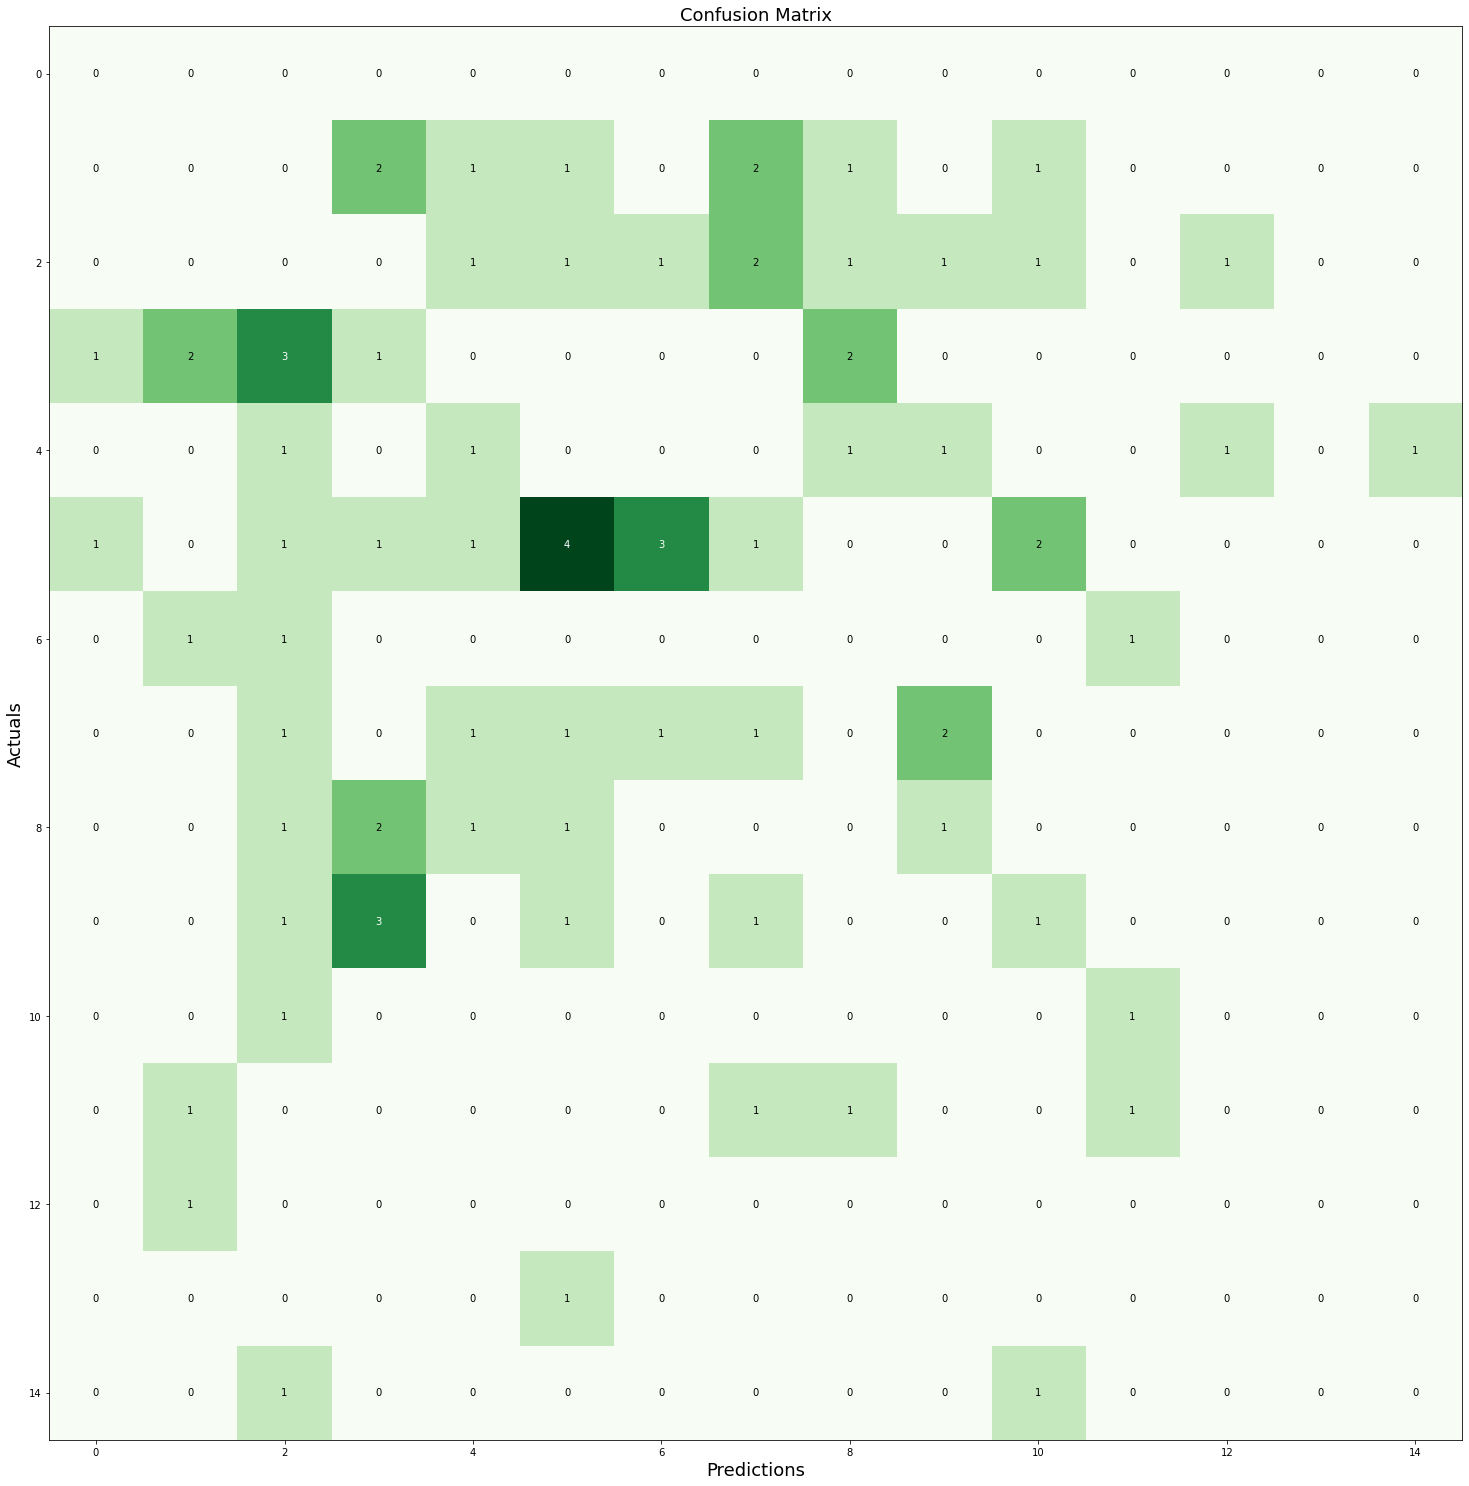

In [260]:
DecisionTree(X_train,X_test,y_train,y_test)

    school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0       GP   F   18       U     GT3       A     4     4   at_home   teacher   
1       GP   F   17       U     GT3       T     1     1   at_home     other   
2       GP   F   15       U     LE3       T     1     1   at_home     other   
3       GP   F   15       U     GT3       T     4     2    health  services   
4       GP   F   16       U     GT3       T     3     3     other     other   
..     ...  ..  ...     ...     ...     ...   ...   ...       ...       ...   
390     MS   M   20       U     LE3       A     2     2  services  services   
391     MS   M   17       U     LE3       T     3     1  services  services   
392     MS   M   21       R     GT3       T     1     1     other     other   
393     MS   M   18       R     LE3       T     3     2  services     other   
394     MS   M   19       U     LE3       T     1     1     other   at_home   

     ... higher internet  romantic  famrel  freetim

In [185]:
student_data_portuguese = pd.read_csv('student/student-por.csv',sep=';')
# student_data_portuguese